In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
data = pd.read_parquet('../data/curated/filled.parquet')
data = data.sort_values('order_datetime')

In [6]:
data['order_datetime'] = data['order_datetime'].astype('datetime64[ns]').dt.date
data.head()

,user_id,merchant_abn,dollar_value,order_id,merchant_name,tags,take_rate,type,postcode,consumer_id,...,state,gender,POA_CODE21,2021_popu,latitude,longitude,New cases / day,month,total,order_datetime
0,10285,10023283211,311.872869,e41d1fb7-d7b9-4758-9c20-1d34337a312d,Felis Limited,"furniture, home furnishings and equipment shop...",0.18,e,6479,191378,...,WA,Female,6479,243.959797,118.396935,-30.651794,5.0,2021-02-01,30332.5,2021-02-28
2344013,22760,29023134283,41.523238,75dc7329-db87-4a9d-9320-f4112094a421,Mollis Lectus Industries,tent and awning shops,4.35,b,2019,772469,...,NSW,Male,2019,13542.000098,151.207504,-33.953432,5.0,2021-02-01,30332.5,2021-02-28
2344014,14105,29023134283,14.340483,d2e7c15a-0937-489e-9162-9ea3f99cfdc7,Mollis Lectus Industries,tent and awning shops,4.35,b,5042,1203759,...,SA,Male,5042,13353.615264,138.576911,-35.009742,5.0,2021-02-01,30332.5,2021-02-28
2344015,9328,29023134283,81.499024,b343adf7-90ec-42b9-b43d-62307876353b,Mollis Lectus Industries,tent and awning shops,4.35,b,2675,26134,...,NSW,Male,2675,4740.194882,145.502046,-33.266766,5.0,2021-02-01,30332.5,2021-02-28
7965145,4476,69666829657,38.453884,c48e108d-e4f7-4ca9-b0b5-79d805d6954f,Sem Ut Institute,bicycle shops - sales and service,2.86,c,7211,820183,...,TAS,Female,7211,327.887453,147.442180,-41.769024,5.0,2021-02-01,30332.5,2021-02-28


In [7]:
grouped = data.groupby('tags')

In [4]:
tag_list = []
rebuy_count = []
rebuy_max = []
rebuy_min = []
for tag, df in grouped:
    tag_list.append(tag)
    rebuy_max.append(max(df.groupby('user_id').count()['dollar_value']))
    rebuy_min.append(min(df.groupby('user_id').count()['dollar_value']))

In [5]:
# tag_dict

In [30]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid
from pyecharts.faker import Faker

c = (
    Bar()
    .add_xaxis(tag_list)
    .add_yaxis("MIN", rebuy_min, color=Faker.rand_color())
    .add_yaxis("MAX", rebuy_max, color=Faker.rand_color())
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="category",
            name="Type",
            boundary_gap=True,
            axislabel_opts=opts.LabelOpts(rotate=-75, interval=0),
        ),
        title_opts=opts.TitleOpts(title="Bar-DataZoom（slider-垂直）"),
        # datazoom_opts=opts.DataZoomOpts(orient="vertical"),
    )
)

grid_chart = (
    Grid(init_opts=opts.InitOpts(width="1000px", height="900px"))
    .add(
        c,
        grid_opts=opts.GridOpts(
            pos_bottom="55%",
        ),
    )
    .render("../plots/Bar_MIN_MAX_by_consumer_tags_count.html")
)

In [27]:
dict_interval_avg = defaultdict(list)
for tag, df in grouped:
    print(tag)
    every_user = df.groupby('user_id')
    for user, df1 in every_user:
        time_of_oreder = df1.order_datetime
        if (len(time_of_oreder) < 2):
            continue
        templist = []
        for i in range(len(time_of_oreder)-1):
            # print(time_of_oreder.iloc[i], time_of_oreder.iloc[i+1] )
            templist.append((time_of_oreder.iloc[i+1] - time_of_oreder.iloc[i]).days)
        
        dict_interval_avg[tag].append(np.average(templist))


antique shops - sales, repairs, and restoration services
art dealers and galleries
artist supply and craft shops
bicycle shops - sales and service
books, periodicals, and newspapers
cable, satellite, and other pay television and radio services
computer programming , data processing, and integrated systems design services
computers, computer peripheral equipment, and software
digital goods: books, movies, music
equipment, tool, furniture, and appliance rent al and leasing
florists supplies, nursery stock, and flowers
furniture, home furnishings and equipment shops, and manufacturers, except appliances
gift, card, novelty, and souvenir shops
health and beauty spas
hobby, toy and game shops
jewelry, watch, clock, and silverware shops
lawn and garden supply outlets, including nurseries
motor vehicle supplies and new parts
music shops - musical instruments, pianos, and sheet music
opticians, optical goods, and eyeglasses
shoe shops
stationery, office supplies and printing and writing paper


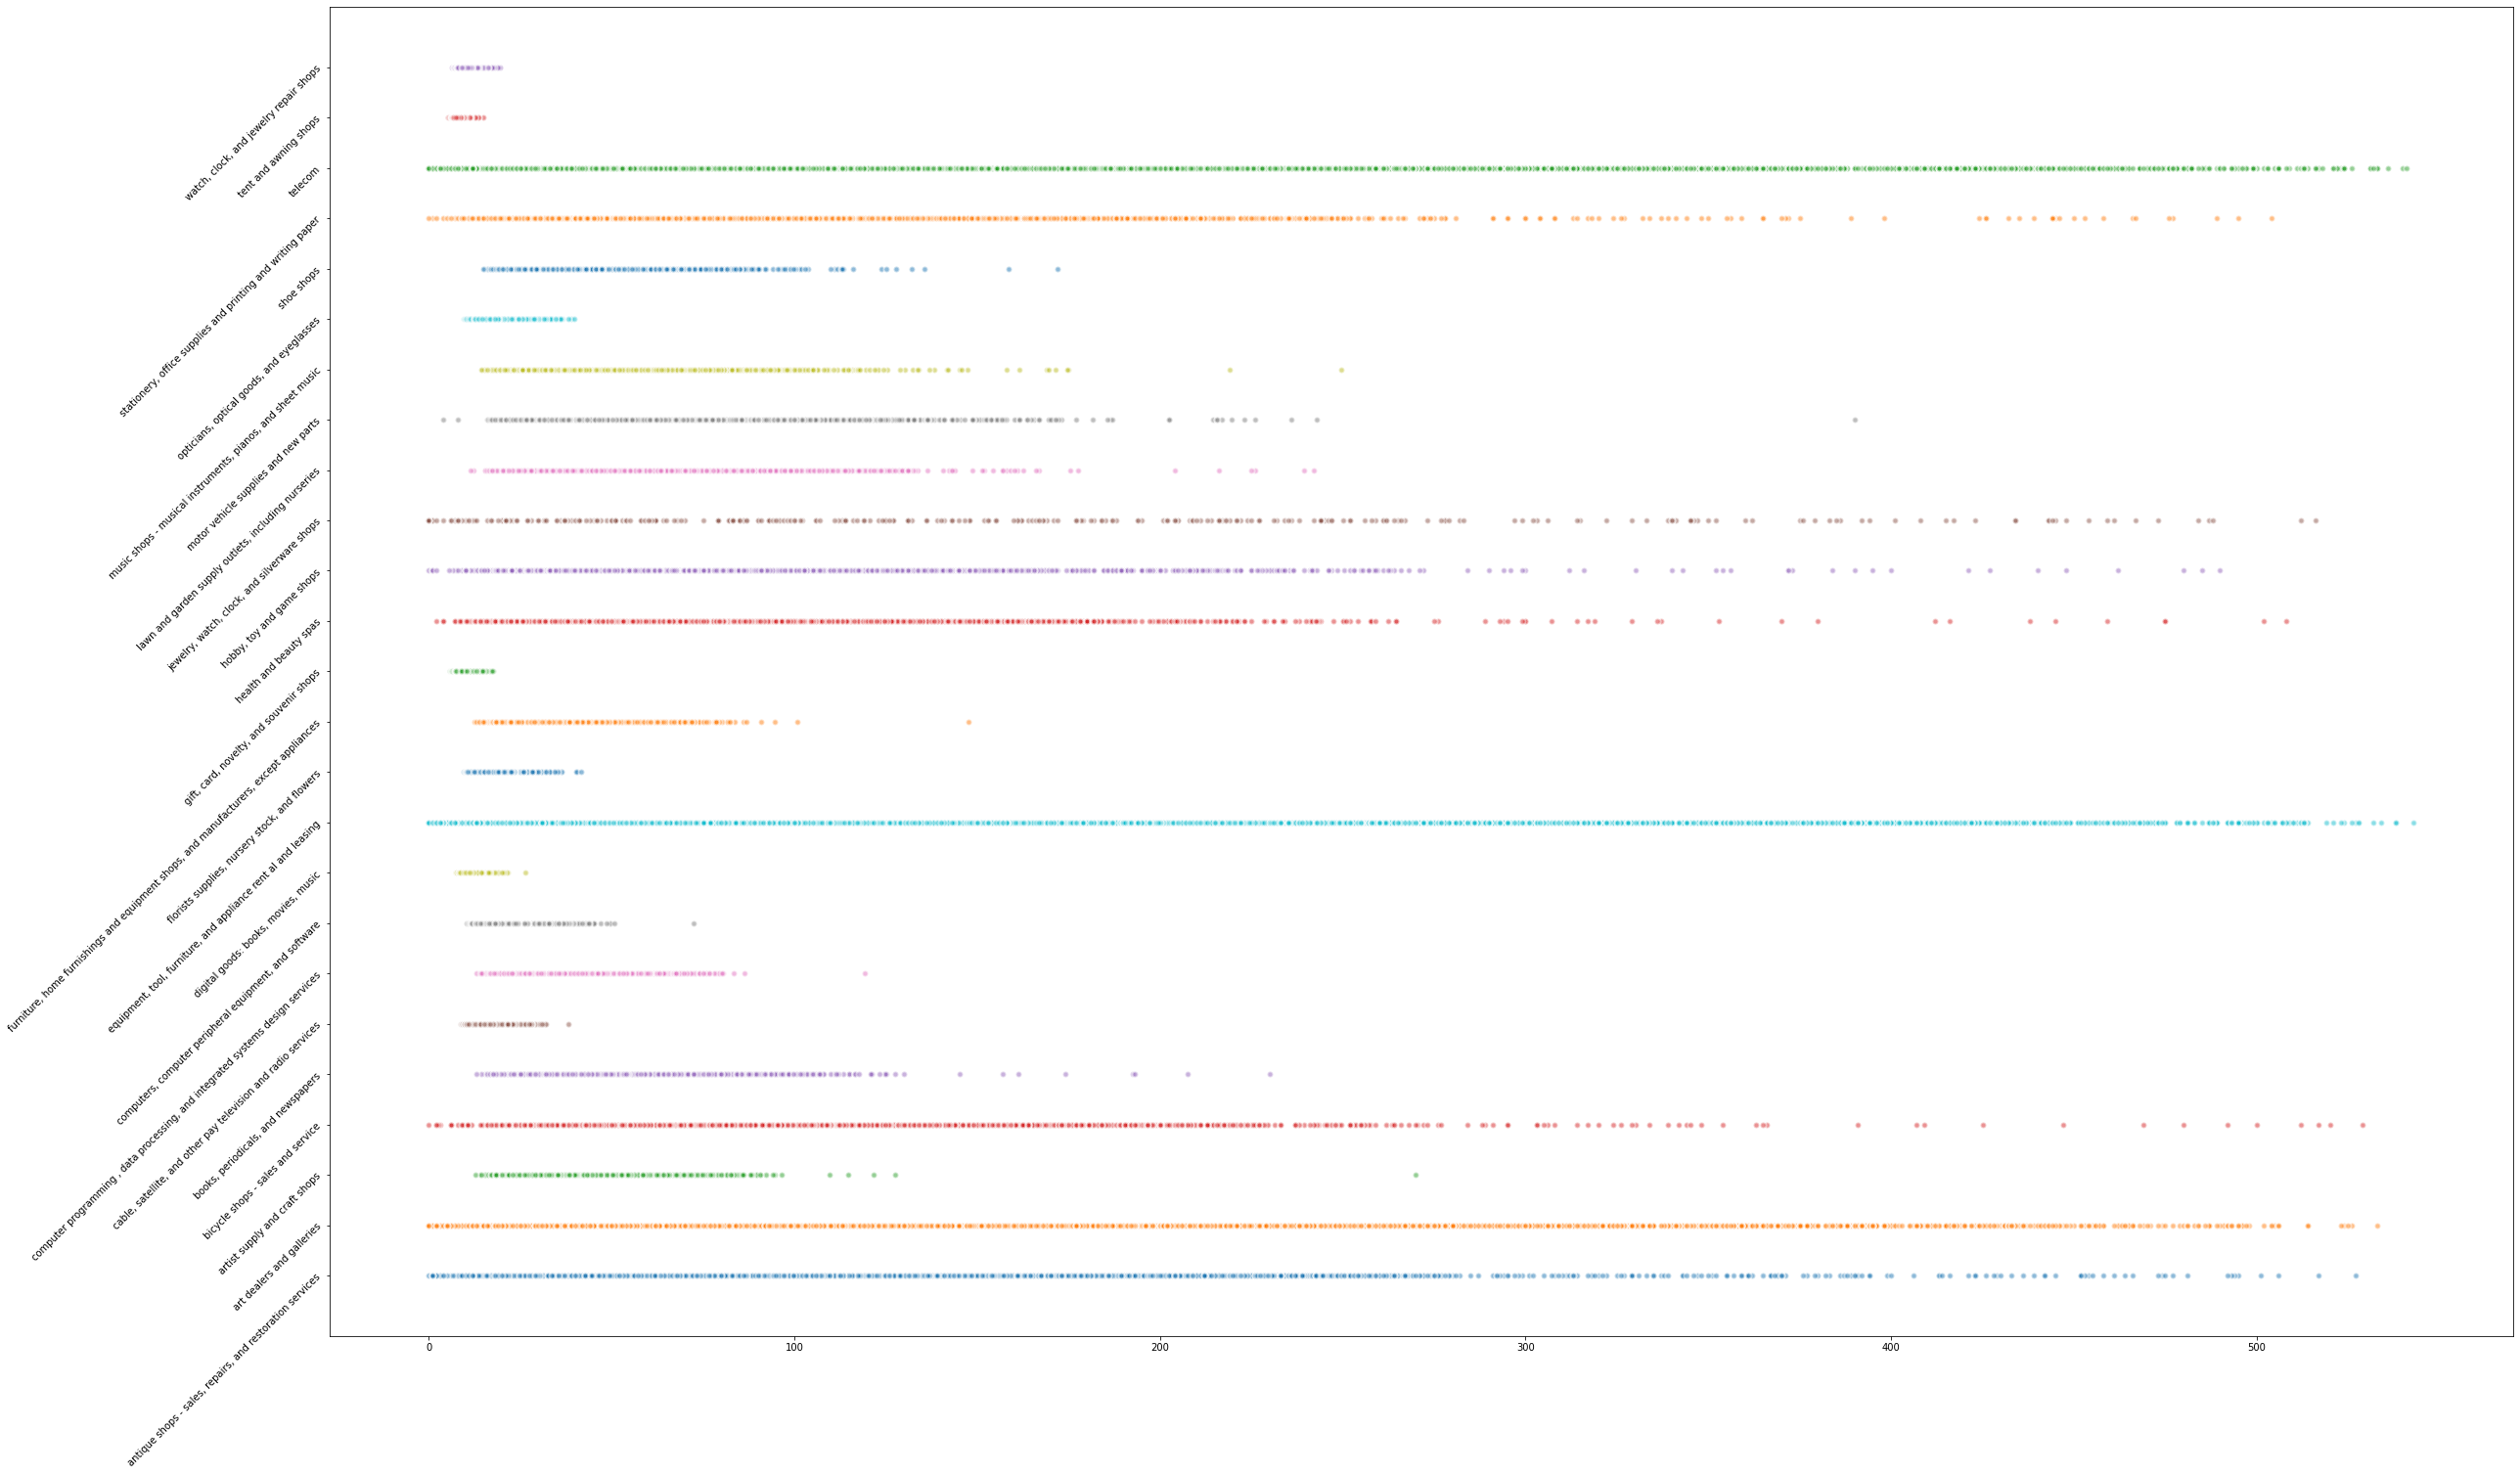

In [69]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(40, 25))

temp = 0
x_list = []
for key, value in dict_interval_avg.items():
    x = list(np.ones(len(value))*temp+0.5)
    x_list.append(temp+0.5)
    plt.scatter(value, x, marker='o', alpha=.5, linewidths=2, edgecolors='w')
    temp+=1
x_change = ["10点{}分".format(i) for i in range(25)] #每隔60分钟，就需要进1，转下一行代码

plt.yticks(x_list, list(dict_interval_avg.keys()), rotation=45) #[::5]表示需要显示的间隔数，数字越大越稀疏，越小越密集，根据需要修改
plt.show()

In [72]:
high_interval = ['antique shops - sales, repairs, and restoration services', 'art dealers and galleries', 'bicycle shops - sales and service', 'equipment, tool, furniture, and appliance rent al and leasing', 'health and beauty spas', 'hobby, toy and game shops', 'jewelry, watch, clock, and silverware shops', 'stationery, office supplies and printing and writing paper', 'telecom']

mid_interval = ['artist supply and craft shops', 'books, periodicals, and newspapers', 'computer programming , data processing, and integrated systems design services', 'furniture, home furnishings and equipment shops, and manufacturers, except appliances', 'lawn and garden supply outlets, including nurseries', 'motor vehicle supplies and new parts', 'music shops - musical instruments, pianos, and sheet music', 'shoe shops', ]

low_interval = ['cable, satellite, and other pay television and radio services', 'computers, computer peripheral equipment, and software', 'digital goods: books, movies, music', 'florists supplies, nursery stock, and flowers', 'gift, card, novelty, and souvenir shops', 'opticians, optical goods, and eyeglasses', 'tent and awning shops', 'watch, clock, and jewelry repair shops']
